In [ ]:
!wget https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/download?datasetVersionNumber=1

--2023-01-08 13:58:09--  https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/download?datasetVersionNumber=1
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fomkargurav%2Fface-mask-dataset%2Fversions%2F1%3Fresource%3Ddownload [following]
--2023-01-08 13:58:09--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fomkargurav%2Fface-mask-dataset%2Fversions%2F1%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download?datasetVersionNumber=1’

download?datasetVer     [ <=>                ]   5.07K  --.-KB/s   

In [ ]:
!wget https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/download?datasetVersionNumber=1

--2023-01-08 14:01:14--  https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/download?datasetVersionNumber=1
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fomkargurav%2Fface-mask-dataset%2Fversions%2F1%3Fresource%3Ddownload [following]
--2023-01-08 14:01:15--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fomkargurav%2Fface-mask-dataset%2Fversions%2F1%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download?datasetVersionNumber=1’

download?datasetVer     [ <=>                ]   5.15K  --.-KB/s   

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [2]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:11<00:00, 17.0MB/s]
100% 163M/163M [00:11<00:00, 14.3MB/s]


In [ ]:
import zipfile
import shutil
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Kaggle/face-mask-dataset.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import glob

In [4]:
plot_list = glob.glob('/content/drive/MyDrive/Kaggle/data/with_mask/*.jpg')[:5]

In [5]:
plot_list

['/content/drive/MyDrive/Kaggle/data/with_mask/with_mask_1138.jpg',
 '/content/drive/MyDrive/Kaggle/data/with_mask/with_mask_1139.jpg',
 '/content/drive/MyDrive/Kaggle/data/with_mask/with_mask_114.jpg',
 '/content/drive/MyDrive/Kaggle/data/with_mask/with_mask_1140.jpg',
 '/content/drive/MyDrive/Kaggle/data/with_mask/with_mask_1141.jpg']

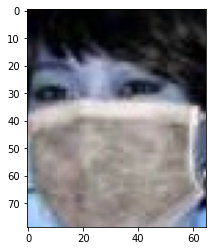

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Kaggle/data/with_mask/with_mask_1138.jpg')
plt.imshow(img)

In [8]:
import tensorflow as tf

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory = '/content/drive/MyDrive/Kaggle/data',
                                                       validation_split = 0.2,
                                                       subset="training",
                                                       image_size = (120,120),
                                                       batch_size = 32,
                                                       seed = 123)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [11]:
validation_ds = tf.keras.utils.image_dataset_from_directory(directory = '/content/drive/MyDrive/Kaggle/data',
                                                       validation_split = 0.2,
                                                       subset="validation",
                                                       image_size = (120,120),
                                                       batch_size = 8,
                                                       seed = 123)

Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [12]:
from tensorflow.python.eager.context import monitoring
cp = tf.keras.callbacks.ModelCheckpoint('model.h5',monitor = 'loss',save_best_only=True )
es = tf.keras.callbacks.EarlyStopping(monitor= 'loss', patience = 5)

In [13]:
callbacks = [cp,es]

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.RandomFlip("horizontal_and_vertical"))
model.add(tf.keras.layers.RandomRotation(0.2))
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3),
                                 activation = 'relu',
                                 input_shape = (120,120,3)))

model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3),
                                 activation = 'relu'))

model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [16]:
history = model.fit(train_ds, validation_data = validation_ds, epochs = 20, callbacks = callbacks)

Epoch 1/20
189/189 [==============================] - 2481s 13s/step - loss: 0.5214 - accuracy: 0.7503 - val_loss: 0.3709 - val_accuracy: 0.8550
Epoch 2/20
189/189 [==============================] - 22s 115ms/step - loss: 0.3801 - accuracy: 0.8430 - val_loss: 0.3327 - val_accuracy: 0.8570
Epoch 3/20
189/189 [==============================] - 22s 115ms/step - loss: 0.3425 - accuracy: 0.8627 - val_loss: 0.2945 - val_accuracy: 0.8801
Epoch 4/20
189/189 [==============================] - 21s 107ms/step - loss: 0.3207 - accuracy: 0.8663 - val_loss: 0.2898 - val_accuracy: 0.8887
Epoch 5/20
189/189 [==============================] - 22s 115ms/step - loss: 0.3140 - accuracy: 0.8734 - val_loss: 0.2743 - val_accuracy: 0.8914
Epoch 6/20
189/189 [==============================] - 24s 126ms/step - loss: 0.3019 - accuracy: 0.8704 - val_loss: 0.2497 - val_accuracy: 0.8974
Epoch 7/20
189/189 [==============================] - 24s 127ms/step - loss: 0.2981 - accuracy: 0.8693 - val_loss: 0.2385 - val_ac

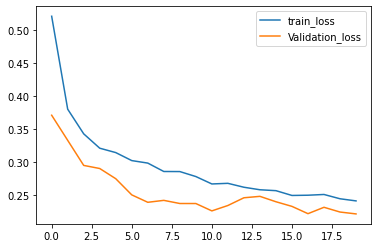

In [17]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(train_loss, label = 'train_loss')
plt.plot(validation_loss, label = 'Validation_loss')
plt.legend()
plt.show()

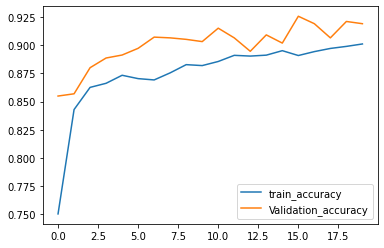

In [18]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label = 'train_accuracy')
plt.plot(validation_accuracy, label = 'Validation_accuracy')
plt.legend()
plt.show()